In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import numpy as np  
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df1 = pd.read_csv("heart_master.csv")

In [3]:
df2 = pd.read_csv("heart_larger_dataset_the same_concat.csv")

In [4]:
df = pd.concat([df1,df2])

In [5]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Data Cleaning- SKIP 

In [6]:
#df2.shape

(1025, 14)

In [7]:
#df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [10]:
#df.duplicated().sum()

1026

In [11]:
#df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
""""
age
sex
chest pain type (4 values)
resting blood pressure  #The person's resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
""""

In [7]:
df.shape

(1328, 14)

In [8]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1328.00,1328.00,1328.00,1328.00,1328.00,1328.00,1328.00,1328.00,1328.00,1328.00,1328.00,1328.00,1328.00,1328.00
mean,54.42,0.69,0.95,131.61,246.06,0.15,0.53,149.24,0.33,1.06,1.39,0.75,2.32,0.52
std,9.07,0.46,1.03,17.51,51.63,0.36,0.53,22.98,0.47,1.17,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


<AxesSubplot:>

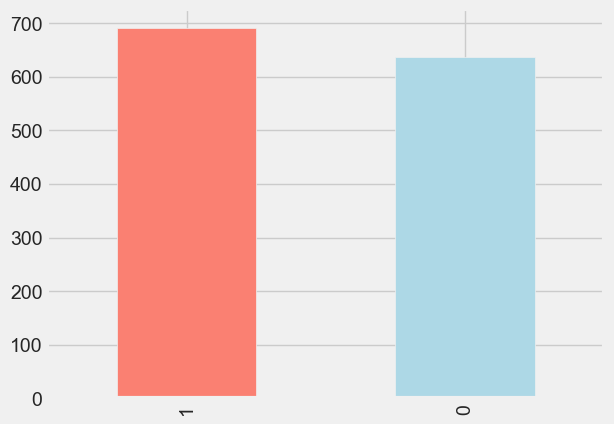

In [9]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [10]:
missing_values = df.isna().sum()
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
categorical_val = []
continuous_val = []

for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    
    
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)


age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

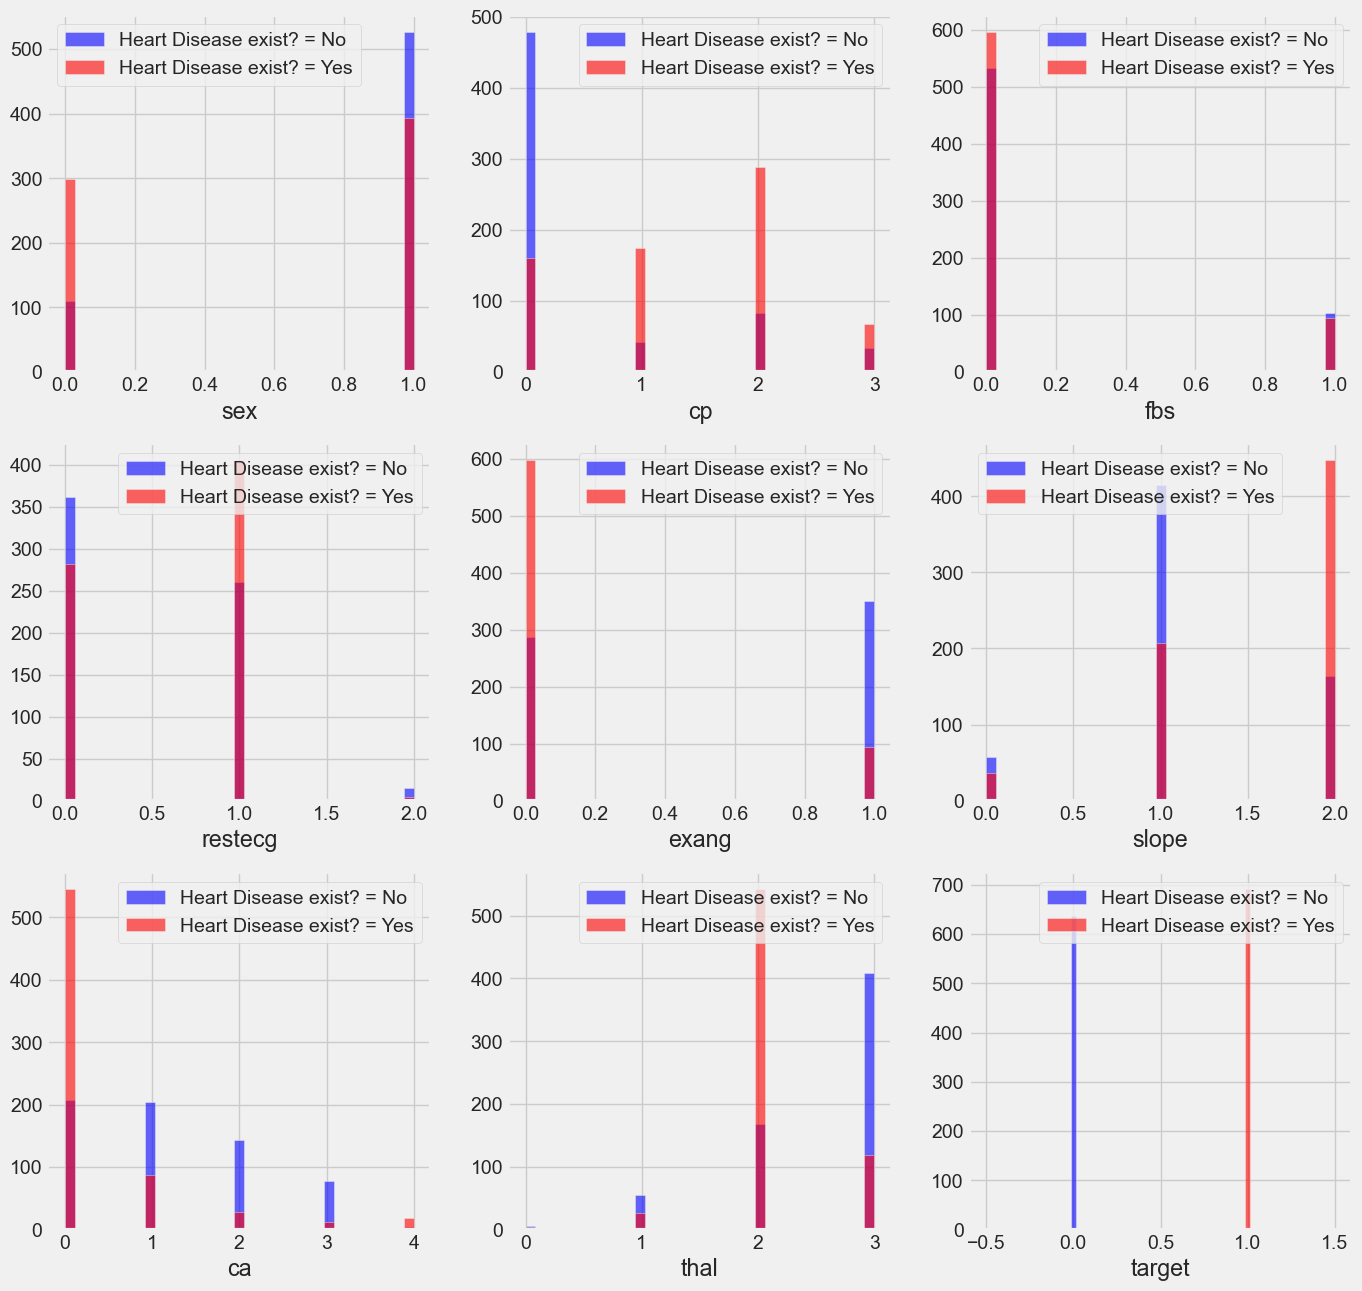

In [12]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Heart Disease exist? = No', alpha=0.6)
    
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Heart Disease exist? = Yes', alpha=0.6)
    
    plt.legend()
    plt.xlabel(column)

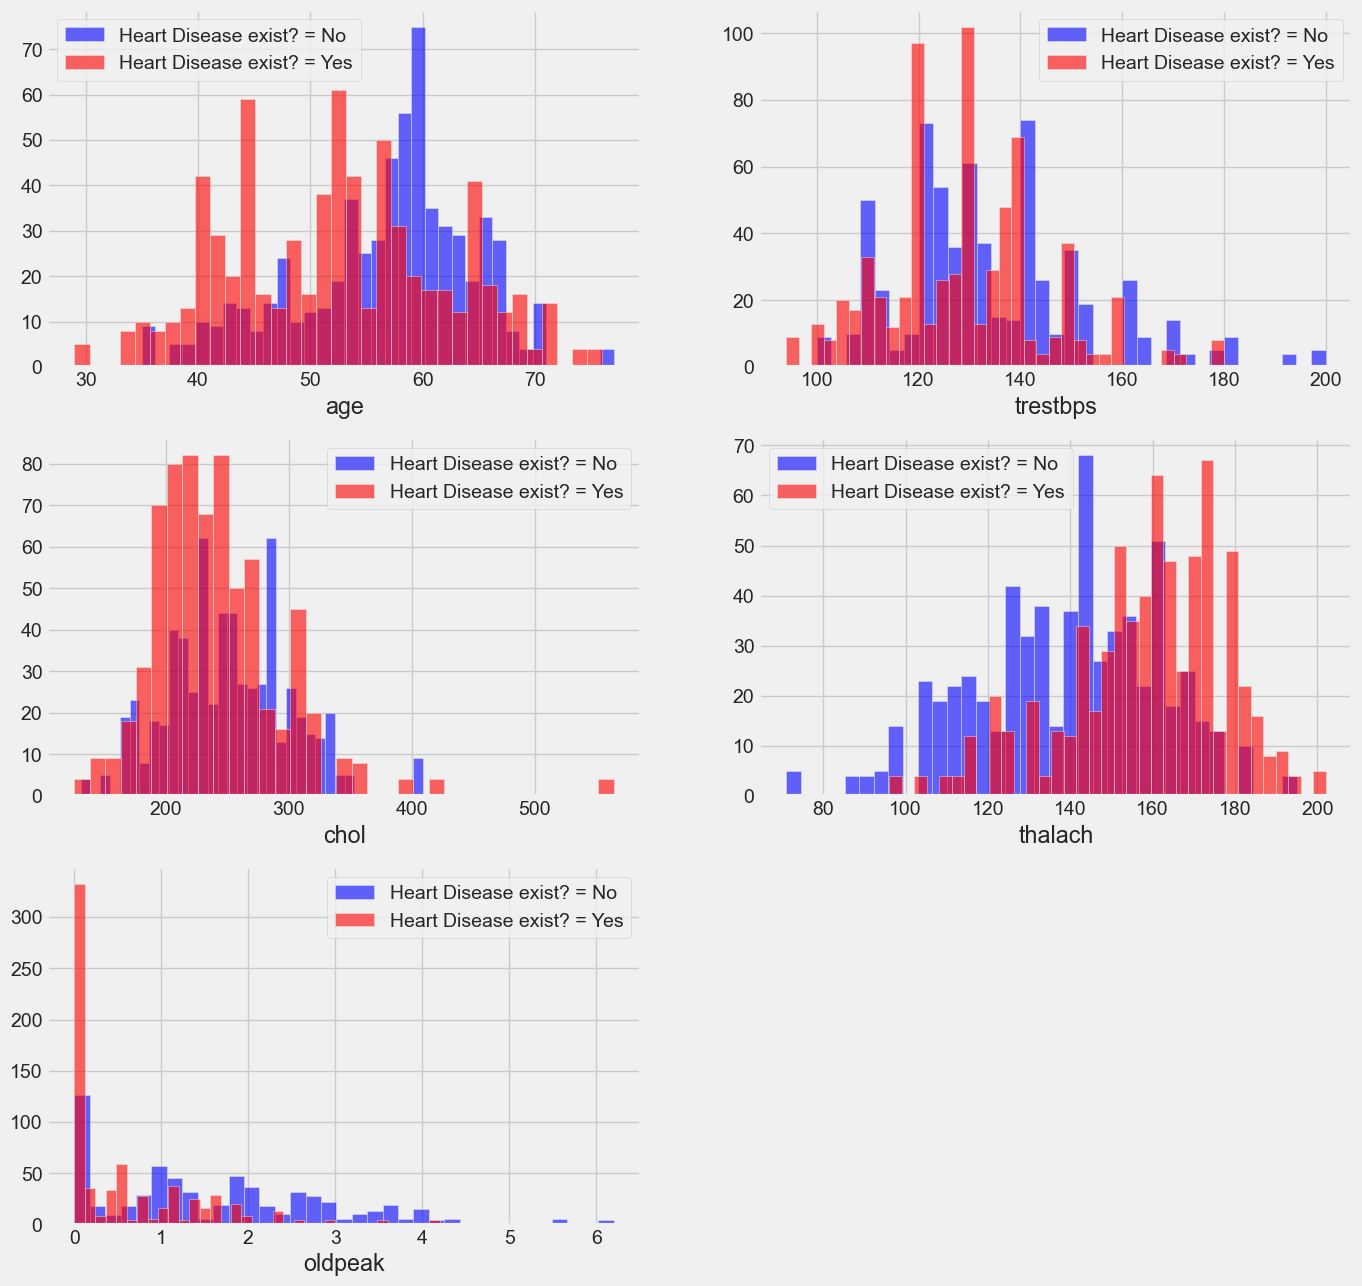

In [13]:

plt.figure(figsize=(15, 15))

for i, column in enumerate(continuous_val, 1):
    plt.subplot(3, 2, i)
    
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Heart Disease exist? = No', alpha=0.6)
    
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Heart Disease exist? = Yes', alpha=0.6)
    
    plt.legend()
    plt.xlabel(column)


In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

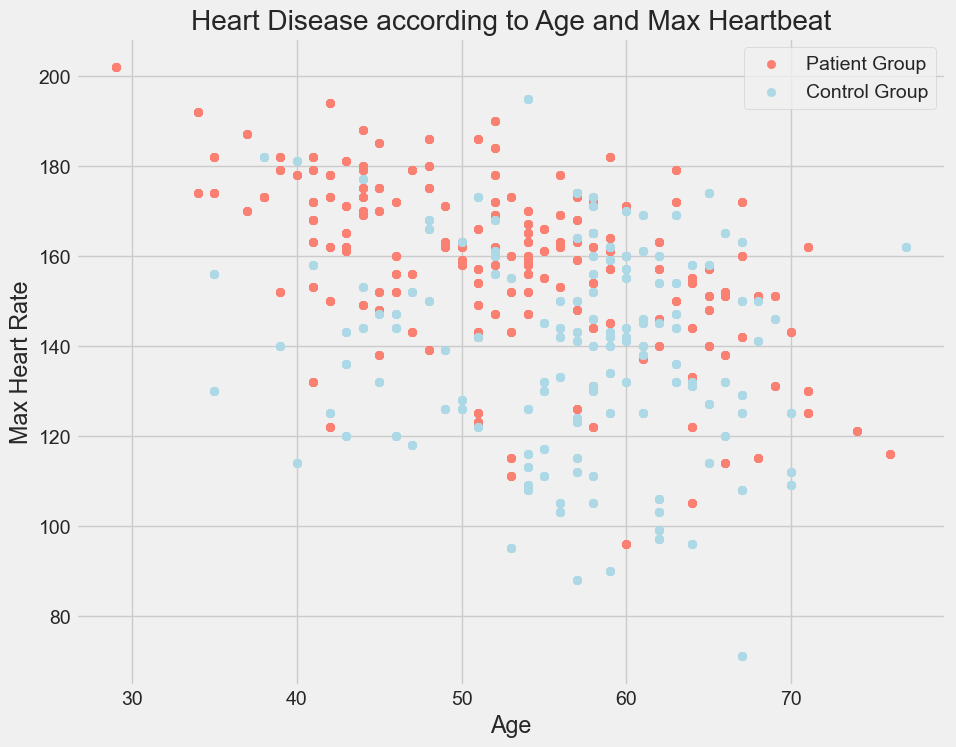

In [15]:
plt.figure(figsize=(10, 8))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")


plt.title("Heart Disease according to Age and Max Heartbeat")


plt.xlabel("Age")

plt.ylabel("Max Heart Rate")


plt.legend(["Patient Group", "Control Group"]);


(14.5, -0.5)

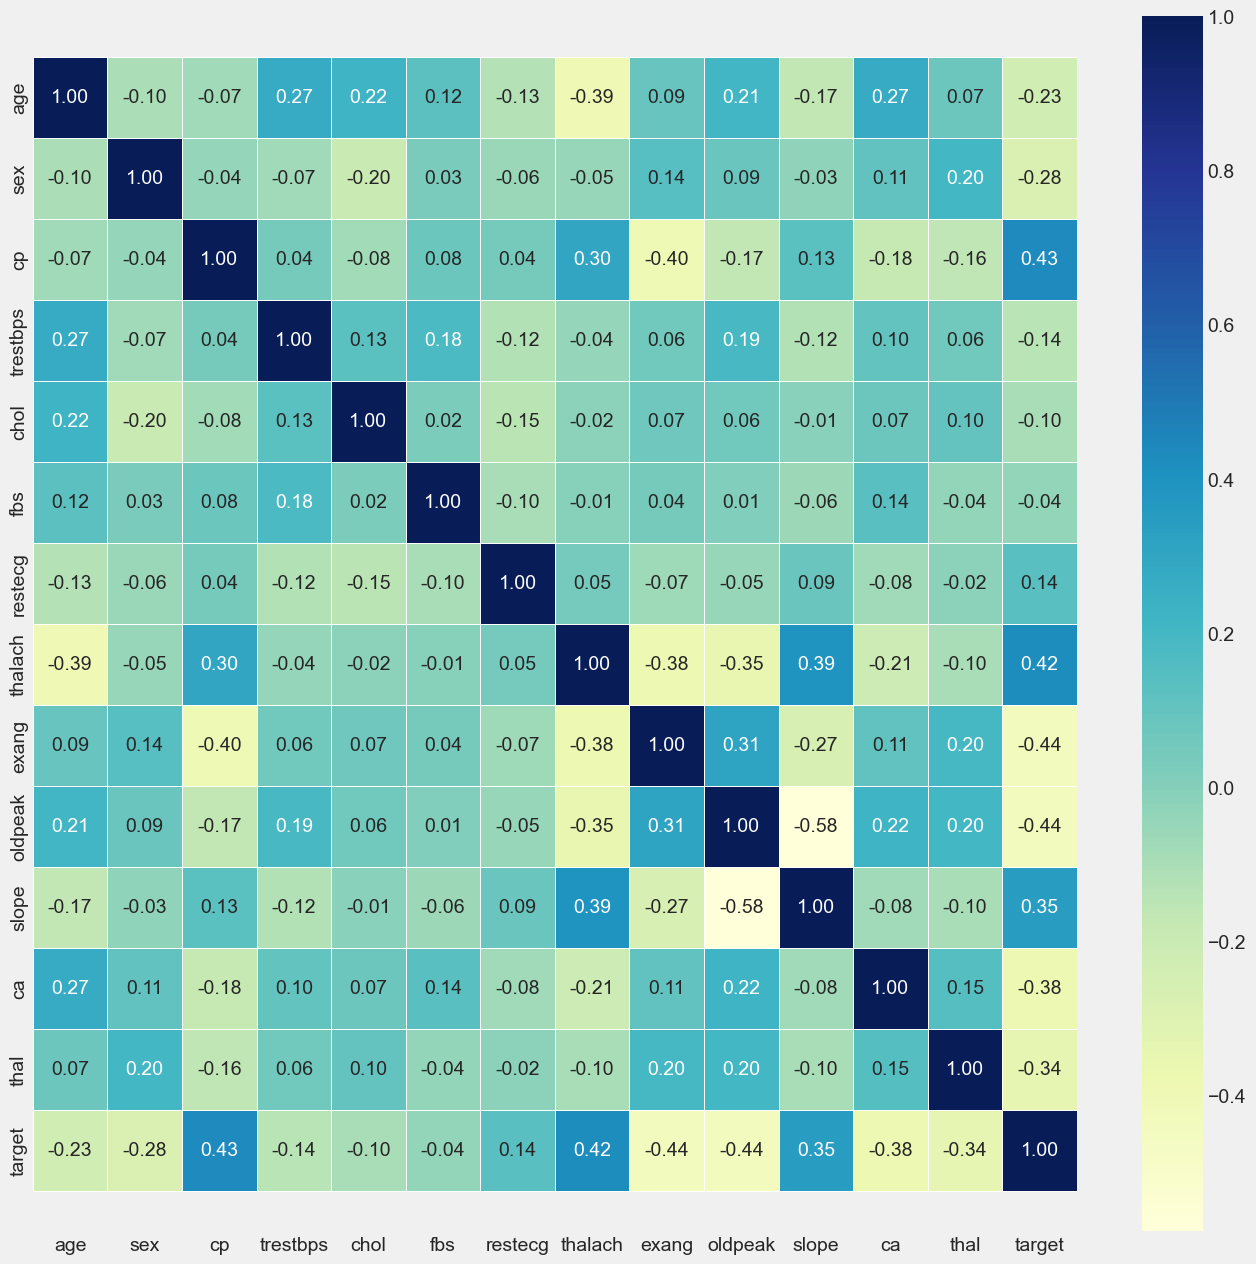

In [16]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 15))

ax = sns.heatmap(corr_matrix,
                 annot=True,        
                 linewidths=0.5,    
                 fmt=".2f",        
                 cmap="YlGnBu")     

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [27]:
df = pd.concat([df1,df2])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


<AxesSubplot:title={'center':'Correlation with target'}>

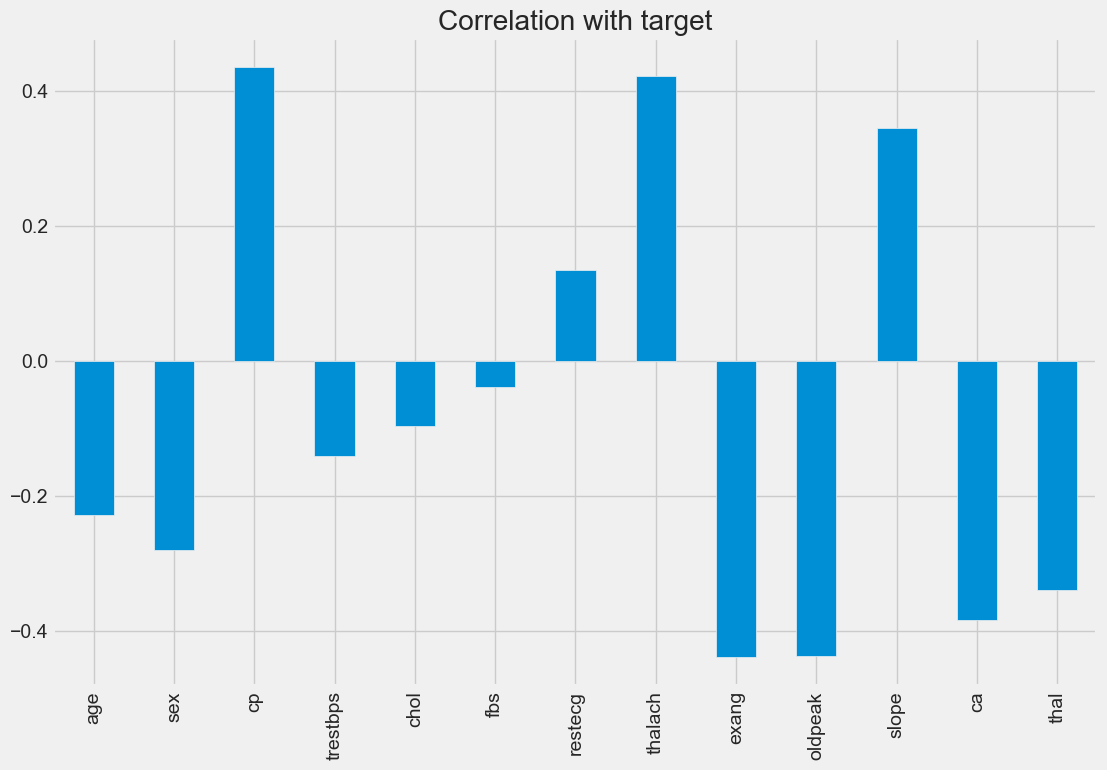

In [28]:
correlation = df.drop('target', axis=1).corrwith(df.target)
correlation.plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   cp        1328 non-null   int64  
 3   trestbps  1328 non-null   int64  
 4   chol      1328 non-null   int64  
 5   fbs       1328 non-null   int64  
 6   restecg   1328 non-null   int64  
 7   thalach   1328 non-null   int64  
 8   exang     1328 non-null   int64  
 9   oldpeak   1328 non-null   float64
 10  slope     1328 non-null   int64  
 11  ca        1328 non-null   int64  
 12  thal      1328 non-null   int64  
 13  target    1328 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 155.6 KB


In [30]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [31]:
dataset = pd.get_dummies(df, columns=categorical_val, drop_first= 'target')

from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

# Manage the name later! looks like the name of the target column changed to the target_1 but the values satyed the same, so 0 values are still inside.

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [33]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3',
       'target_1'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split

#x_df = df.drop(columns=['target'])

X = dataset.drop(columns=['target_1'], axis=1)

y = dataset.target_1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 88.48%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.90   0.87      0.88       0.89          0.89
recall      0.86   0.91      0.88       0.88          0.88
f1-score    0.88   0.89      0.88       0.88          0.88
support   447.00 482.00      0.88     929.00        929.00
_______________________________________________
Confusion Matrix: 
 [[383  64]
 [ 43 439]]

Test Result:
Accuracy Score: 85.21%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.85   0.85      0.85       0.85          0.85
recall      0.84   0.87      0.85       0.85          0.85
f1-score    0.84   0.86      0.85       0.85          0.85
support   190.00 209.00      0.85     399.00        399.00
_______________________________________________
Confusion Matrix: 
 [[159  31]
 [ 28 181]]



The results:

After training the system, we got the accuracy score on the training set as 88.48% and on the test set as 85.21%. f1-score for accuracy as  0.85 . This results shows that the system is quite accurate, but totally as for the training set, the accuracy score is slightly higher and 88.48% is quite too high for a machine learning model. It might be that it is overfitting. Beside model evaluation, it might be necessary to check manually with a random data. Still, the results are pretty good and highly likely to detect the diseases correctly.

In [36]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100

train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.48,85.21


When we compare this notebook with the one dataset notebook, this one is less accurate. the reason could be that the new data dataset I concated here includes some duplications. The data clening part was not succesful as the entire data seems be duplicated somehow. As I mentioned above, this system is usable.

# CHECK DATA CLEANING PART